In [20]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from pyhdf.SD import SD, SDC
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap, cm

In [21]:
# Open the file.
file_name = "/home/filip/Downloads/MOD06_L2.A2023065.2115.061.2023132225410.hdf"
file_name2 = "/home/filip/Downloads/MOD06_L2.A2023065.1130.061.2023132225319.hdf"
file_name3 = "/home/filip/Downloads/MOD06_L2.A2023066.1035.061.2023132232352.hdf"
file_name4 = "/home/filip/Downloads/MOD06_L2.A2023066.1210.061.2023132233141.hdf"
file_name5 = "/home/filip/Downloads/MOD09.A2023065.1130.061.2023067180702.hdf"


hdf = SD(file_name, SDC.READ)
# hdf2 = SD(file_name2, SDC.READ)
# hdf3 = SD(file_name3, SDC.READ)
# hdf4 = SD(file_name4, SDC.READ)
hdf5 = SD(file_name5, SDC.READ)
#hdf_20210321 = SD("/home/filip/Downloads/MOD06_L2.A2021080.1125.061.2021268140954.hdf", SDC.READ)





# List available datasets.
datasets = hdf5.datasets()
for idx, sds in enumerate(datasets.keys()):
    print(idx, sds)


0 1km Atmospheric Optical Depth Band 1
1 1km Atmospheric Optical Depth Band 3
2 1km Atmospheric Optical Depth Band 8
3 1km Atmospheric Optical Depth Model
4 1km water_vapor
5 1km Atmospheric Optical Depth Band QA
6 1km Atmospheric Optical Depth Band CM
7 250m Surface Reflectance Band 1
8 250m Surface Reflectance Band 2
9 500m Surface Reflectance Band 1
10 500m Surface Reflectance Band 2
11 500m Surface Reflectance Band 3
12 500m Surface Reflectance Band 4
13 500m Surface Reflectance Band 5
14 500m Surface Reflectance Band 6
15 500m Surface Reflectance Band 7
16 1km Surface Reflectance Band 1
17 1km Surface Reflectance Band 2
18 1km Surface Reflectance Band 3
19 1km Surface Reflectance Band 4
20 1km Surface Reflectance Band 5
21 1km Surface Reflectance Band 6
22 1km Surface Reflectance Band 7
23 1km Surface Reflectance Band 8
24 1km Surface Reflectance Band 9
25 1km Surface Reflectance Band 10
26 1km Surface Reflectance Band 11
27 1km Surface Reflectance Band 12
28 1km Surface Reflectan

In [ ]:

def plot_vars(hdf, lon, lat, projection, vars, lon_lat_limits = [None, None, None, None]):
    fig, axs = plt.subplots(len(vars), 1, figsize=[10,5*len(vars)], subplot_kw={'projection': projection}, dpi=300)

    for i, var in enumerate(vars):
        var_name = var.replace("_", " ")
        dataset = hdf.select(var)
        if var == "Atm_Corr_Refl":
            data = dataset[:][:,:,0].astype(float)
        else:
            data = dataset[:].astype(float)
        data[data==-9999] = np.nan
        data[data==dataset.attributes()["_FillValue"]] = np.nan

        data = (data - dataset.attributes()["add_offset"])*dataset.attributes()["scale_factor"] #+ dataset.attributes()["add_offset"]
        data = np.ma.masked_array(data, np.isnan(data))
        #data[data <0] = np.nan
        downsample_factor_x = int(data.shape[0] / lon.shape[0])
        downsample_factor_y = int(data.shape[1] / lon.shape[1])
        downsampled_data = data[::downsample_factor_x, ::downsample_factor_y]
        
        if lon.shape[1] != downsampled_data.shape[1]:
            downsampled_data = downsampled_data[:, :-1]
        axs[i].coastlines()
        gl = axs[i].gridlines(draw_labels=True)
        quadmesh = axs[i].pcolormesh(lon, lat, downsampled_data, transform=ccrs.PlateCarree())
        plt.colorbar(quadmesh, label= var_name + " [%s]" %(dataset.attributes()["units"] if dataset.attributes()["units"] != "none" else "unitless"))
        if lon_lat_limits[0] != None:
            axs[i].set_extent([lon_lat_limits[0], lon_lat_limits[1], lon_lat_limits[2], lon_lat_limits[3]], ccrs.PlateCarree())
        axs[i].set_title(var_name)
        
        # plt.figure(figsize=[50, 10])
        # m = Basemap(projection="cyl", resolution="l", llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=-60, urcrnrlon=50)
        # m.drawcoastlines()
        # x, y = m(lon, lat)
        # m.pcolormesh(x, y, downsampled_data, shading='nearest'),
    #plt.contourf(downsampled_data)
    fig.tight_layout()


In [ ]:
lon = hdf5.select('Longitude')[:]
lat = hdf5.select('Latitude')[:]
projection = ccrs.NorthPolarStereo()
vars = ["250m Surface Reflectance Band 1", "1km Surface Reflectance Band 1"]
plot_vars(hdf5, lon, lat, projection, vars)#, [lon_min, lon_max, lat_min, lat_max])



In [ ]:

# # Replace 'YOUR_DATASET_NAME' with the dataset you're interested in.
# lon = hdf4.select('Longitude')[:]
# lat = hdf4.select('Latitude')[:]
# lon_min = lon.min()
# lat_min = lat.min()
# lon_max = lon.max()
# lat_max = lat.max()
# vars = ["Cloud_Top_Height", "cloud_emissivity_1km"]
# #vars = ["Cloud_Phase_Infrared", "Cloud_Effective_Emissivity", "Cloud_Fraction", "Cloud_Fraction_Nadir"]
# projection = ccrs.NorthPolarStereo()
# plot_vars(hdf4, lon, lat, projection, vars)#, [lon_min, lon_max, lat_min, lat_max])


[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/home/filip/.local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


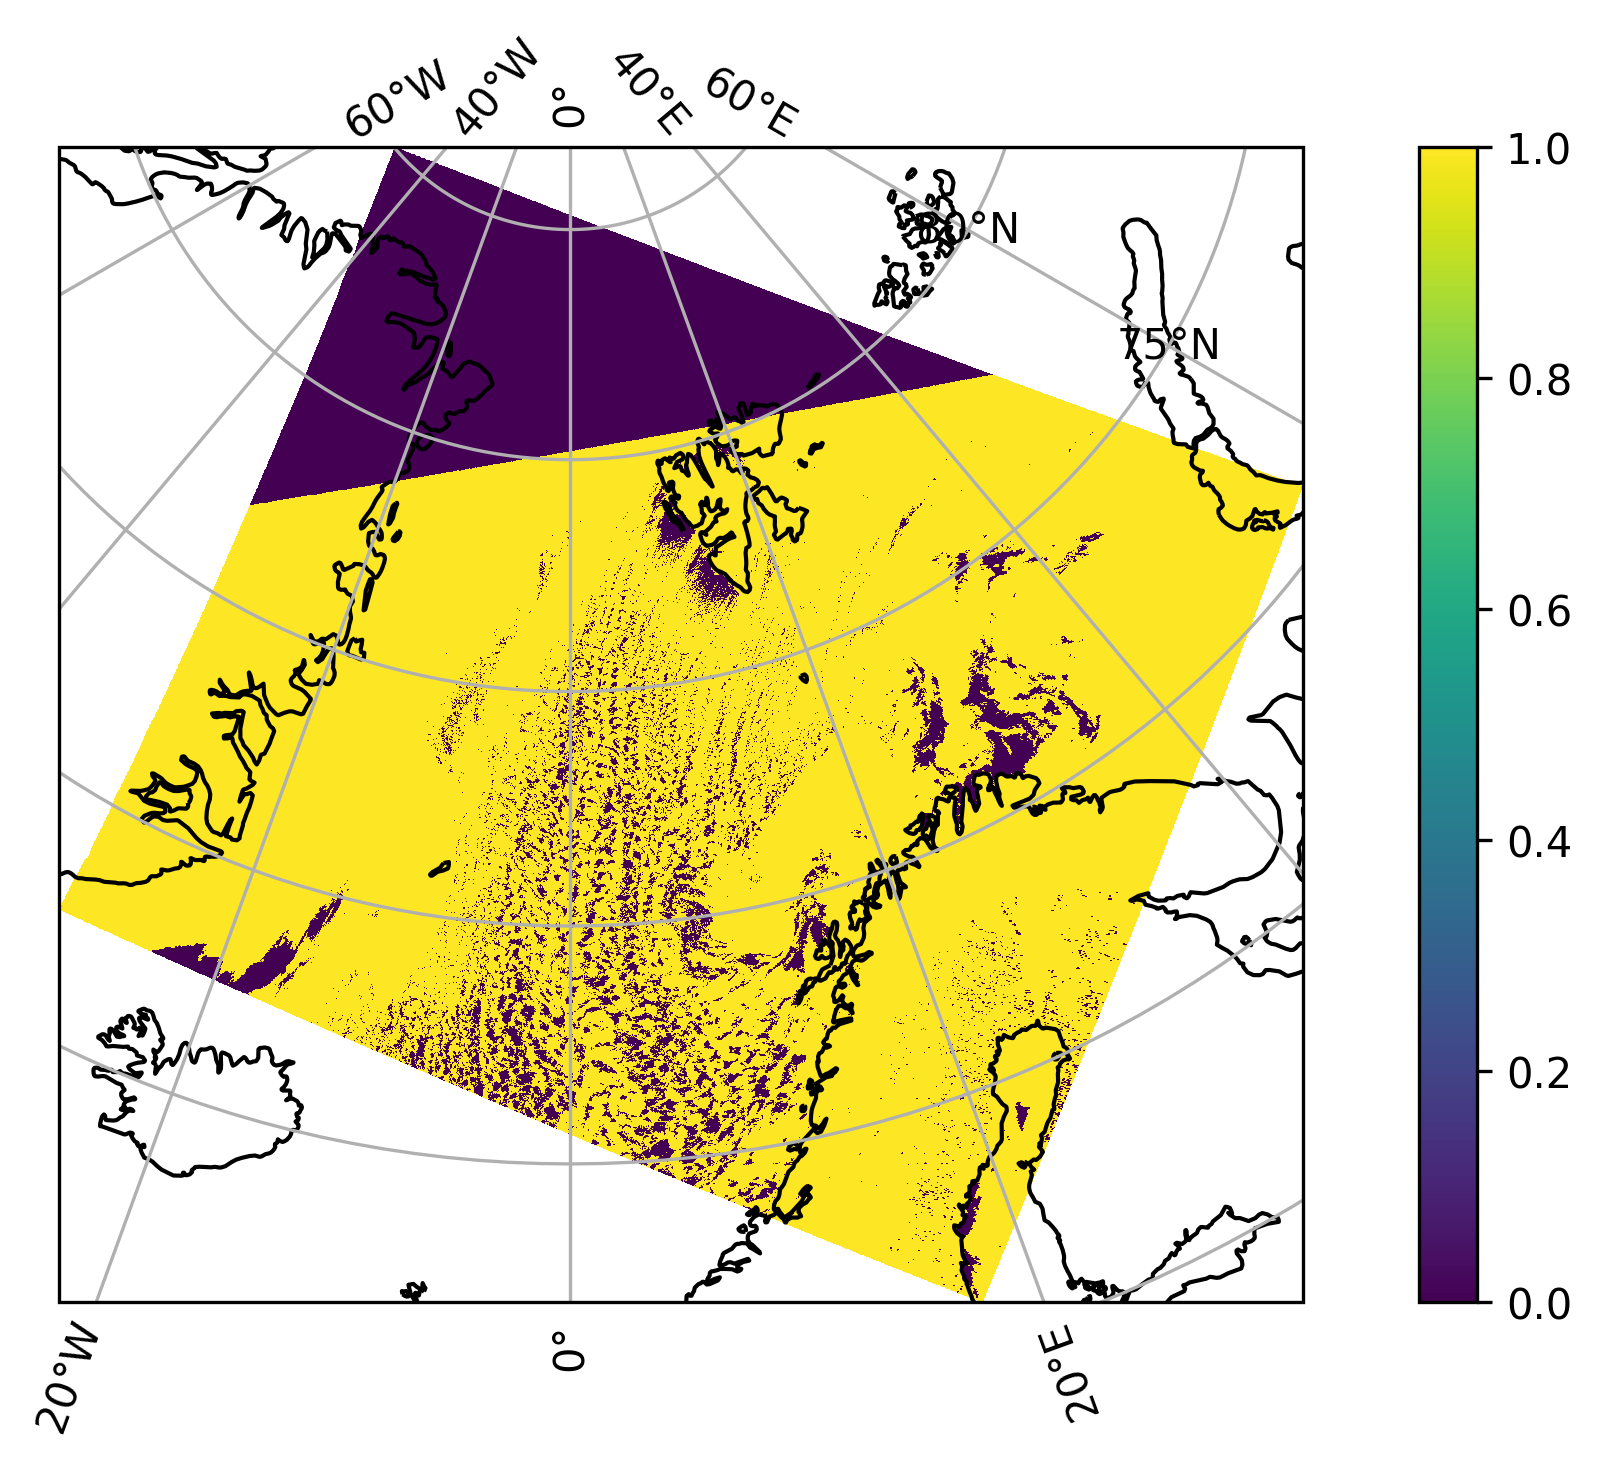

In [45]:
dataset = hdf5.select("1km Surface Reflectance Band 1")
data = dataset[:]
data[data == dataset.attributes("_FillValue")] = 0
data =( (data - dataset.attributes()["add_offset"])*dataset.attributes()["scale_factor"])[:]
data_02 = np.int16(np.where(data > 0.2, 1, 0))
data_03 = np.int16(np.where(data > 0.3, 1, 0))
data_01 = np.int16(np.where(data > 0.1, 1, 0))


lon = hdf5.select("Longitude")[:]
lat = hdf5.select("Latitude")[:]
downsample_factor_x = int(data.shape[0] / lon.shape[0])
downsample_factor_y = int(data.shape[1] / lon.shape[1])
data_d = data[::downsample_factor_x, ::downsample_factor_y]
data_d = np.int16(np.where(data_d > 0.1, 1, 0))
print(data_d.astype(int))
projection = ccrs.NorthPolarStereo()
fig, axs = plt.subplots(1, 1, figsize=[10,5], subplot_kw={'projection': projection}, dpi=300)
plt.pcolormesh(lon, lat, data_d, transform=ccrs.PlateCarree())  
axs.coastlines()
gl = axs.gridlines(draw_labels=True)
plt.colorbar()
plt.show()

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

class simple_autoencoder:
    def __init__(self, datasets=[], patch_size=4):
        self.n_vars = len(datasets)
        self.data_shape = datasets[0][:].shape
        self.patch_size = patch_size

        self.get_patches(datasets)
        
    def get_patches(self, datasets):
        self.patches = []

        for i in range(self.n_vars):
            if "attributes" in datasets:
                data = datasets[i][:].astype(float)
                data[data==-9999] = np.nan
                data[data==datasets[i].attributes()["_FillValue"]] = np.nan

                data = (data - datasets[i].attributes()["add_offset"])*datasets[i].attributes()["scale_factor"] #+ dataset.attributes()["add_offset"]
                data = np.where(np.isnan(data), -1, data)
                normalized_data = (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))
            else:
                normalized_data = datasets[i]


            self.patches.append( tf.image.extract_patches(
                images=tf.expand_dims(tf.expand_dims(normalized_data, -1), 0),
                sizes=[1, self.patch_size, self.patch_size, 1],
                strides=[1, self.patch_size, self.patch_size, 1],
                rates=[1, 1, 1, 1],
                padding='VALID'
            ))

        # Concatenate patches from both arrays along the channel dimension
        if self.n_vars > 1:
            combined_patches = tf.concat(self.patches, axis=-1)
            self.patches = tf.reshape(combined_patches, (-1, self.patch_size, self.patch_size, self.n_vars))
        else:
            self.patches = tf.reshape(self.patches, (-1, self.patch_size, self.patch_size, self.n_vars))

    def encode(self):
        #encoder_input = keras.Input(shape=(patch_size, patch_size, 1))
        self.encoder_input = keras.Input(shape=(self.patch_size, self.patch_size, self.n_vars)) 
        x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(self.encoder_input)
        x = keras.layers.MaxPooling2D((2, 2))(x)
        x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        self.encoded = keras.layers.MaxPooling2D((2, 2))(x)


        self.encoder = keras.Model(self.encoder_input, self.encoded)

    def decode(self):
        decoder_input = keras.Input(shape=(self.encoded.shape[1], self.encoded.shape[2], self.encoded.shape[3]))
        x = keras.layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(decoder_input)
        x = keras.layers.UpSampling2D((2, 2))(x)
        x = keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
        x = keras.layers.UpSampling2D((2, 2))(x)
        decoded = keras.layers.Conv2DTranspose(self.n_vars, (3, 3), activation='sigmoid', padding='same')(x)  

        self.decoder = keras.Model(decoder_input, decoded)

    def fit(self, epochs, batch_size, predict_self=True):
        self.encode()
        self.decode()

        self.autoencoder = keras.Model(self.encoder_input, self.decoder(self.encoded))
        self.autoencoder.compile(optimizer='adam', loss='mse')  # Using MSE loss

        self.autoencoder.fit(self.patches, self.patches, epochs=epochs, batch_size=batch_size)
        
        if predict_self:
            encoded_patches = self.encoder.predict(self.patches)

            # Flatten the encoded patches for clustering
            self.encoded_patches_flat = encoded_patches.reshape(encoded_patches.shape[0], -1)
        
    def dbscan(self, eps=0.5, min_samples=5):
        # DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(self.encoded_patches_flat)

        # Assuming your original data shape is (height, width)
        height, width = self.data_shape

        # Calculate the dimensions of the reduced resolution array
        reduced_height = height // self.patch_size
        reduced_width = width // self.patch_size

        cluster_map = np.reshape(labels, (reduced_height, reduced_width))
        return cluster_map

    def kmeans(self, n_clusters=10):
        # KMeans clustering
        kmeans = KMeans(n_clusters).fit(self.encoded_patches_flat)
        labels = kmeans.labels_
        # Assuming your original data shape is (height, width)
        height, width = self.data_shape

        # Calculate the dimensions of the reduced resolution array
        reduced_height = height // self.patch_size
        reduced_width = width // self.patch_size

        cluster_map = np.reshape(labels, (reduced_height, reduced_width))
        return cluster_map

    def reconstruct_from_patches(self, predicted_patches):
        reconstructed_shape = [self.data_shape[0], self.data_shape[1], self.n_vars]

        reconstructed_data = np.zeros(reconstructed_shape)

        patch_idx = 0
        for i in range(0, reconstructed_shape[0], self.patch_size):
            for j in range(0, reconstructed_shape[1], self.patch_size):
                for k in range(self.n_vars):
                    reconstructed_data[i:i+self.patch_size, j:j+self.patch_size, k] = predicted_patches[patch_idx, :, :, k]
                patch_idx += 1

        return reconstructed_data



In [70]:
patch_size = 8
#data1 = hdf.select("Cloud_Fraction")
# data2 = hdf.select("Cloud_Top_Height")
# data3 = hdf.select("Cloud_Effective_Emissivity")
# data = [data1, data2, data3]

autoencoder = simple_autoencoder([data_01], patch_size)
autoencoder_2 = simple_autoencoder([data_02], patch_size)
#autoencoder_2.fit(25,32)
# autoencoder = simple_autoencoder([data_d], patch_size)


Epoch 1/25


/tmp/ipykernel_17595/3086635405.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "attributes" in datasets:


1337/1337 [==============================] - 6s 4ms/step - loss: 0.0285
Epoch 2/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0106
Epoch 3/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0066
Epoch 4/25
 395/1337 [=======>......................] - ETA: 3s - loss: 0.0052

In [67]:
data[0][:].shape

autoencoder.fit(25,32)


Epoch 1/25
1337/1337 [==============================] - 6s 4ms/step - loss: 0.0197
Epoch 2/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0082
Epoch 3/25
1337/1337 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 4/25
1337/1337 [==============================] - 5s 3ms/step - loss: 0.0041
Epoch 5/25
1337/1337 [==============================] - 5s 3ms/step - loss: 0.0033
Epoch 6/25
1337/1337 [==============================] - 5s 3ms/step - loss: 0.0028
Epoch 7/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 8/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 9/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 10/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 11/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 12/25
1337/1337 [==============================] - 5s 4ms/step - loss: 0.0014
E

In [62]:

predicted_patches = autoencoder.autoencoder.predict(autoencoder.patches)
reconstructed_data = autoencoder.reconstruct_from_patches(predicted_patches)

# # Visualize the original and reconstructed data
# n_images = 10  # For instance, visualize 10 images
# fig, axs = plt.subplots(2, n_images, figsize=(20, 4))
# for i in range(n_images):
#     # Original data
#     original = autoencoder.patches[i].numpy()[:,:,0].reshape(autoencoder.patch_size, autoencoder.patch_size)
#     axs[0, i].imshow(original, cmap='gray')
#     axs[0, i].axis('off')
    
#     # Reconstructed data
#     recon = reconstructed_data[i][:,:,0].reshape(autoencoder.patch_size, autoencoder.patch_size)
#     axs[1, i].imshow(recon, cmap='gray')
#     axs[1, i].axis('off')

# axs[0, 0].set_title("Original")
# axs[1, 0].set_title("Reconstructed")
print(reconstructed_data.shape)
plt.contourf(reconstructed_data)
plt.show()


21/21 [==============================] - 1s 41ms/step


ValueError: could not broadcast input array from shape (64,64) into shape (64,10)

/home/filip/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


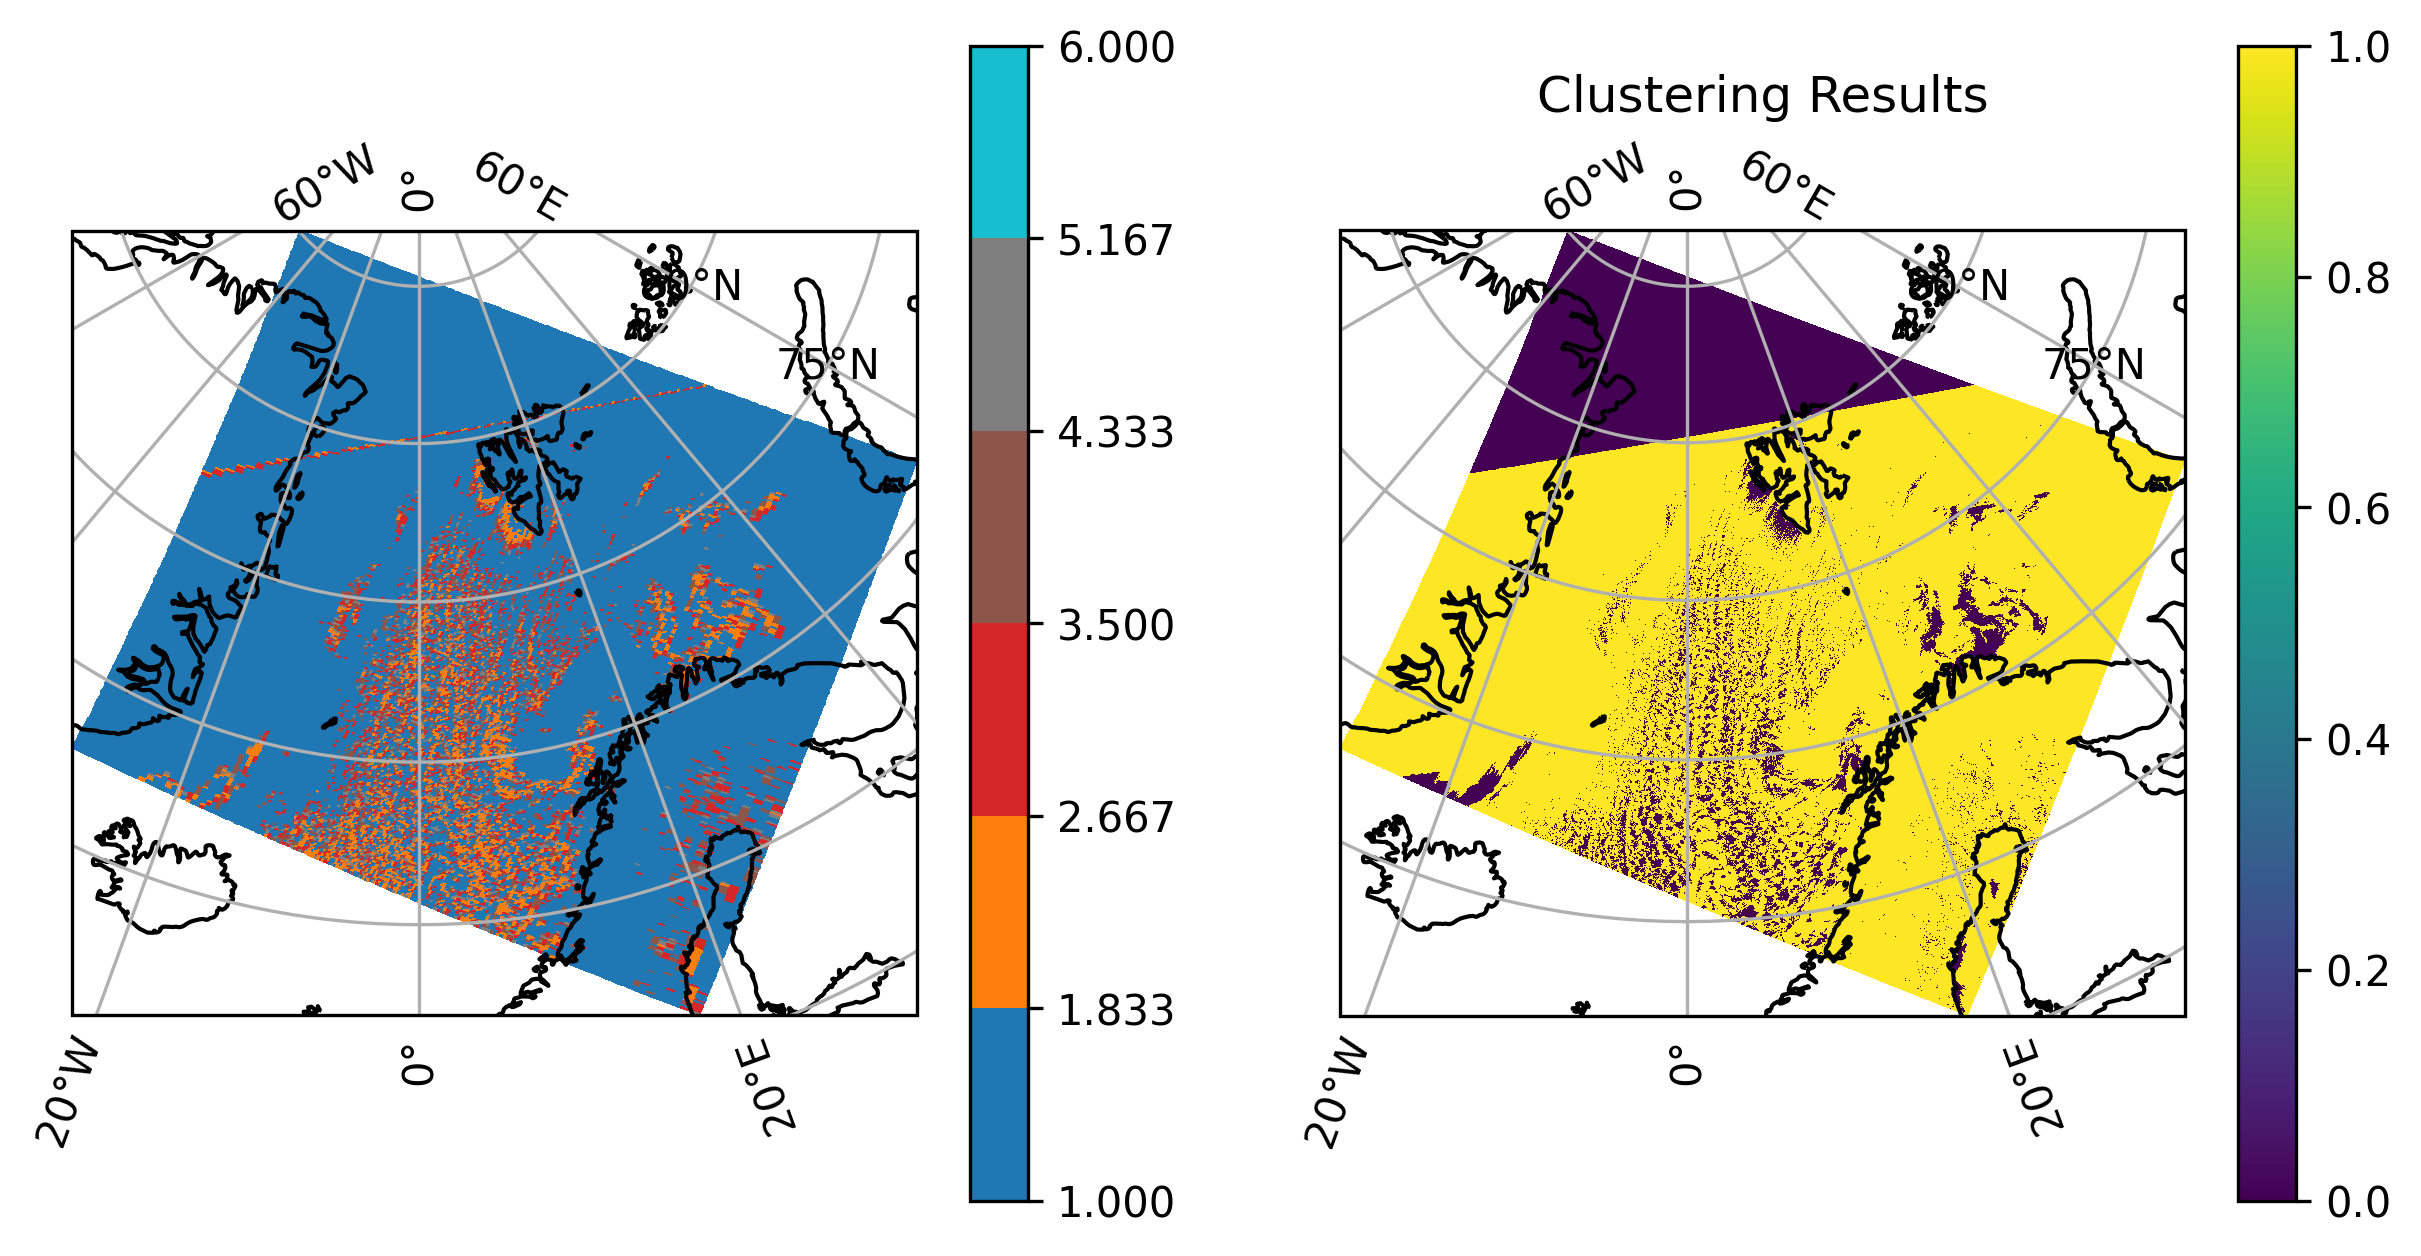

In [68]:
import matplotlib.colors as mcolors
lon = hdf5.select("Longitude")[:]
lat = hdf5.select("Latitude")[:]
# lon = hdf5.select("longitude")
# lat = hdf5.select("latitude")

n_clusters = 6
cluster_map = autoencoder.kmeans(n_clusters)


#plt.figure(figsize=(10, 10))
projection = ccrs.NorthPolarStereo()
fig, axs = plt.subplots(1, 2, figsize=[10,5], subplot_kw={'projection': projection}, dpi=300)

downsample_factor_x = int(lon.shape[0] / cluster_map.shape[0])
downsample_factor_y = int(lon.shape[1] / cluster_map.shape[1])
lon_d = lon[::downsample_factor_x, ::downsample_factor_y]
lat_d = lat[::downsample_factor_x, ::downsample_factor_y]
#mesh = axs.pcolormesh(lon, lat, data2, transform=ccrs.PlateCarree())

cmap = plt.cm.tab10
levels =  np.linspace(1, n_clusters, n_clusters+1)
norm = mcolors.BoundaryNorm(levels, cmap.N)
mesh = axs[0].pcolormesh(lon_d, lat_d, cluster_map, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
axs[0].coastlines()
gl = axs[0].gridlines(draw_labels=True)
cbar = plt.colorbar(mesh)

mesh = axs[1].pcolormesh(lon, lat, data_01, transform=ccrs.PlateCarree())
axs[1].coastlines()
gl = axs[1].gridlines(draw_labels=True)
#plt.contourf(cluster_map, levels=np.unique(labels), cmap='jet') # Using 'jet' colormap, but you can choose any
cbar = plt.colorbar(mesh)

plt.title('Clustering Results')
plt.show()


In [ ]:
# Assuming cluster_map is your 2D array after clustering
transition_zones = np.zeros(cluster_map.shape)
lab1, lab2 = 0, 4
# Check for horizontal transitions
for i in range(cluster_map.shape[0]):
    for j in range(cluster_map.shape[1]-1):
        if (cluster_map[i, j] == lab1 and cluster_map[i, j+1] == lab2) or (cluster_map[i, j] == lab2 and cluster_map[i, j+1] == lab1):
            transition_zones[i, j] = 1
            transition_zones[i, j+1] = 1

# Check for vertical transitions
for i in range(cluster_map.shape[0]-1):
    for j in range(cluster_map.shape[1]):
        if (cluster_map[i, j] == lab1 and cluster_map[i+1, j] == lab2) or (cluster_map[i, j] == lab2 and cluster_map[i+1, j] == lab1):
            transition_zones[i, j] = 1
            transition_zones[i+1, j] = 1

# Visualization
projection = ccrs.NorthPolarStereo()
fig, axs = plt.subplots(1, 1, figsize=[10,5], subplot_kw={'projection': projection}, dpi=300)
#plt.pcolormesh(lon_d, lat_d, cluster_map, cmap='tab10', transform=ccrs.PlateCarree())  # Displaying clustering results
plt.pcolormesh(lon_d, lat_d, transition_zones, cmap='Reds', alpha=0.5, transform=ccrs.PlateCarree())  # Overlaying boundaries in red
axs.coastlines()
gl = axs.gridlines(draw_labels=True)
plt.colorbar()
plt.title('Boundaries between label %s and %s' %(lab1, lab2))
plt.show()

In [ ]:
from scipy.signal import convolve2d

# Assuming `output` is the 2D array from the autoencoder

avg_grid_size = 5
kernel = np.ones((avg_grid_size, avg_grid_size)) * 1/avg_grid_size**2


cluster_map_changed = cluster_map.astype(float)
cluster_map_changed[(cluster_map_changed != lab1) & (cluster_map_changed != lab2)] = np.nan
#cluster_map_changed = np.ma.masked_array(cluster_map_changed, np.isnan(cluster_map_changed))
smoothed_output = convolve2d(cluster_map_changed, kernel, mode='same', boundary='symm')
print(np.sum(np.isnan(smoothed_output)))
smoothed_output_filter = smoothed_output
min_filter, max_filter = 3.6, 3.8

smoothed_output_filter[(smoothed_output_filter<min_filter) | (smoothed_output_filter > max_filter)] = np.nan

projection = ccrs.NorthPolarStereo()
fig, axs = plt.subplots(1, 2, figsize=[12,5], subplot_kw={'projection': projection}, dpi=300)
isnan_filter = ~np.isnan(smoothed_output_filter)
dataset = hdf5.select("1km Surface Reflectance Band 1")
#dataset = hdf4.select("Cloud_Top_Height")#[:].astype(float)
data = dataset[:].astype(float)
data[data==-9999] = np.nan
data[data==dataset.attributes()["_FillValue"]] = np.nan
data = (data - dataset.attributes()["add_offset"])*dataset.attributes()["scale_factor"] #+ dataset.attributes()["add_offset"]
data[data>6000] = np.nan
data = np.ma.masked_array(data, np.isnan(data))
        
mesh = axs[0].pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())


axs[0].scatter(lon_d[:-1,:-1][isnan_filter], lat_d[:-1,:-1][isnan_filter], transform=ccrs.PlateCarree(), color="red", alpha=0.1)
plt.colorbar(mesh)

mesh = axs[1].pcolormesh(lon_d, lat_d, smoothed_output_filter, transform=ccrs.PlateCarree())

plt.colorbar(mesh)
axs[0].coastlines()
gl = axs[0].gridlines(draw_labels=True)
axs[1].coastlines()
gl = axs[1].gridlines(draw_labels=True)
plt.show()

